In [16]:
from zget_data import get_responses, get_qdetails, page_map, attention, quest_map
import pandas as pd
import json
import seaborn as sns

In [17]:
password_response, time_response, survey_response = get_responses(5)

Total: 26


## Password Analysis

In [18]:
pd.DataFrame(password_response)

,password2
0,CozyBi11$
1,PRO333TECT
2,moasdjkleR-
3,visotech@2023
4,blake
5,Up9@$LZm
6,berry56
7,123456789
8,vistech2022
9,12john$ena


## Time Analysis

,startstudy,fpasssurvey,pagegif,desinint,quest,csquest,motivation,spass,scog,spasssurvey,spassrecall,demo,total (mins)
0,5.174,11.211,6.987,15.680,36.149,110.712,12.244,35.100,16.638,24.316,8.088,28.816,5.185250
1,1.664,22.872,3.551,5.522,43.416,115.263,2.750,48.463,7.047,17.072,15.119,96.297,6.317267
2,2.518,24.259,6.060,23.769,64.722,155.704,16.275,103.741,24.917,38.085,29.028,41.692,8.846167
3,1.185,6.706,2.497,4.896,30.463,44.975,3.134,30.806,6.813,9.182,12.165,42.267,3.251483
4,2.279,11.596,2.961,19.275,26.708,73.747,5.899,63.512,12.727,18.612,4.775,39.436,4.692117


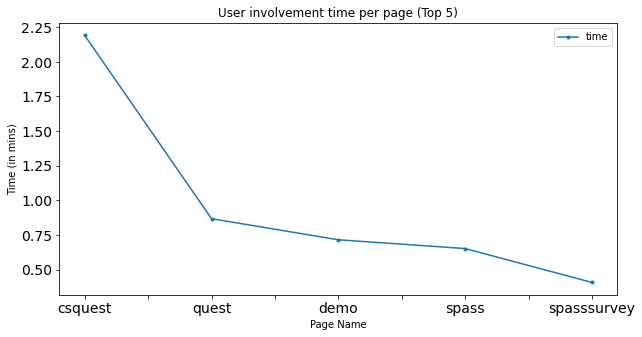

In [19]:
page_time_df = pd.DataFrame(time_response)
page_time_df = page_time_df.sort_index(axis=1, key=lambda x: x.astype(int))
page_time_df = page_time_df.rename(page_map, axis=1)
page_time_df['total (mins)'] = page_time_df.sum(axis=1)/60
display(page_time_df.head())

# top 5 pages with higher time
top5 = pd.DataFrame(columns=['page', 'time'])
for i, data in page_time_df.median().div(60).sort_values(ascending=False).head(5).items():
    top5 = pd.concat([top5, pd.DataFrame([[i, data]], columns=top5.columns)])

_ = top5.plot(x='page', y='time', figsize=(10, 5), xlabel="Page Name", ylabel="Time (in mins)", title="User involvement time per page (Top 5)", fontsize=14, style=".-")

## Survey Response Analysis

In [20]:
survey_response_df = pd.DataFrame(survey_response)

### Quest

In [21]:
normqsid = ['1-2', '1-4', '1-7', '1-10', '1-12', '1-13', '1-16']
quest = pd.DataFrame(survey_response_df['7'].to_dict()).astype(int)
quest.drop(attention.get('7'), inplace=True)
normquest = 8 - quest.loc[normqsid]
quest.update(normquest)


# normalize scale 1 to 8 to scale -3 to 3
quest = quest - 4
quest.update(quest)

new_index = {}
for qsid in quest.index:
    likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('7', qsid).replace("'", '"')).get('elements').get(likert_scale)
new_index
quest = quest.rename(new_index)
quest['mean'] = quest.mean(axis=1)
quest['median'] = quest.median(axis=1)
quest['STD'] = quest.std(axis=1)

quest

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,mean,median,STD
helpful,3.0,3.0,1.0,0.0,3.0,-3.0,1.0,-1.0,2.0,2.0,...,0.0,3.0,-3.0,3.0,1.0,-1.0,2.0,1.038462,1.000000,1.835483
structured,2.0,2.0,1.0,1.0,3.0,0.0,0.0,1.0,1.0,2.0,...,2.0,1.0,3.0,2.0,1.0,0.0,1.0,1.461538,1.461538,1.193525
ordered,3.0,3.0,1.0,0.0,1.0,0.0,0.0,-1.0,1.0,3.0,...,2.0,2.0,0.0,3.0,0.0,-1.0,1.0,1.384615,1.384615,1.362920
rewarding,1.0,3.0,-1.0,-2.0,2.0,-3.0,-1.0,-1.0,2.0,1.0,...,2.0,-1.0,-3.0,2.0,-1.0,-2.0,1.0,0.423077,1.000000,1.749784
beneficial,2.0,2.0,1.0,-2.0,1.0,-3.0,-2.0,0.0,3.0,3.0,...,-1.0,2.0,-3.0,3.0,1.0,-1.0,3.0,1.000000,2.000000,1.990387
well grouped,3.0,2.0,0.0,0.0,1.0,-2.0,0.0,2.0,2.0,1.0,...,1.0,3.0,0.0,2.0,2.0,0.0,1.0,1.269231,1.000000,1.321969
organized,3.0,3.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,...,3.0,2.0,0.0,3.0,0.0,-1.0,1.0,1.461538,1.000000,1.314688
appealing,1.0,2.0,-1.0,2.0,1.0,-3.0,2.0,0.0,2.0,3.0,...,2.0,1.0,-3.0,1.0,1.0,-1.0,2.0,0.884615,1.000000,1.662959
understandable,3.0,2.0,3.0,2.0,1.0,0.0,1.0,1.0,2.0,3.0,...,2.0,3.0,3.0,3.0,1.0,1.0,2.0,1.961538,2.000000,0.961537
clear,3.0,-1.0,-1.0,2.0,1.0,0.0,-1.0,-1.0,2.0,-3.0,...,2.0,3.0,3.0,2.0,1.0,0.0,2.0,1.115385,1.115385,1.640391


In [22]:
cats = {}
for k, v in quest_map.items():
    temp = quest.loc[v]
    cats[k] = temp

for k, v in cats.items():
    print(f'{k}: {v["mean"].mean()}')
    print(f'{k}: {v["STD"].std()}')


Perspicuity: 1.5
Perspicuity: 0.3187582013450522
Aesthetics: 0.6538461538461539
Aesthetics: 0.23943189314690994
Usefulness: 0.875
Usefulness: 0.11271665283821898
Clarity: 1.3942307692307692
Clarity: 0.07298939033921263


### CSQuest

In [23]:
csquest = pd.DataFrame(survey_response_df['8'].to_dict())

qualindex = ['8-1', '10-1']
csquestqual = csquest.loc[qualindex]
# csquestqual.to_csv('data/qualitative/csquest_consequences.csv')
csquestqual

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
8-1,"[Social Media, Email, Financial Websites, Cour...","[Social Media, Email]","[Social Media, Email, Financial Websites, Gove...","[Social Media, Email, Financial Websites, E-co...","[Social Media, Email, Government Websites]",[None of the above],"[Social Media, Email, E-commerce Websites]","[Email, Gaming Websites, E-commerce Websites]","[Social Media, Email, Financial Websites, E-co...","[Social Media, Email, Financial Websites, Gami...",...,"[Email, Financial Websites, E-commerce Website...","[Email, Financial Websites, E-commerce Website...","[Financial Websites, Gaming Websites, E-commer...","[Social Media, Email]","[Social Media, Email, Financial Websites, Gami...",[None of the above],"[Email, Financial Websites, Gaming Websites, E...",[Financial Websites],"[Financial Websites, E-commerce Websites]","[Email, Financial Websites, E-commerce Website..."
10-1,The possibility of it showing a threat by only...,THE LAST PART IS REALLT MOTIVATES TO MAKE A ST...,"The fear of my personal information (phone, lo...",email and social media,the hacker being able to steal it so eaisly,Literally nothing. It looks like it was create...,online account,"use a mix number,character,name ,symbol",email and social media,Yes the strong password was not being hacked e...,...,The result seems like the best motivator for m...,None specifically.,The area that shows the hacker gaining access ...,Second part,The first slide just sets the scene. It's the...,None. fyi - One of my skills and experiences ...,My credit card info being hacked,i would most strong password to make with my b...,"When I see ""Credit Card Info"" as one of the pi...",The hacker's screen saying attack successful a...


In [24]:
csquestquant = csquest.drop(qualindex).fillna(0).astype(int)
csquestquant.drop(attention.get('8'), inplace=True)

normqsid = []
normcsquestquant = 8 - csquestquant.loc[normqsid]
csquestquant.update(normquest)


# normalize scale 1 to 8 to scale -3 to 3
csquestquant = csquestquant - 4
csquestquant.update(csquestquant)

new_index = {}
for qsid in csquestquant.index:
    new_index[qsid] = json.loads(get_qdetails('8', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
csquestquant = csquestquant.rename(new_index)
csquestquant['mean'] = csquestquant.mean(axis=1)
csquestquant['median'] = csquestquant.median(axis=1)
csquestquant['STD'] = csquestquant.std(axis=1)


csquestquant

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,mean,median,STD
portrayal of hacker stimulates,1.0,2.0,1.0,1.0,3.0,-3.0,1.0,2.0,1.0,2.0,...,2.0,2.0,-3.0,1.0,1.0,-1.0,2.0,1.153846,1.153846,1.556166
portrayal of victim encourages,1.0,0.0,1.0,1.0,1.0,-3.0,1.0,1.0,0.0,2.0,...,1.0,2.0,-3.0,3.0,1.0,-1.0,2.0,0.923077,1.000000,1.488871
Makes me worried,2.0,1.0,0.0,0.0,1.0,-3.0,0.0,0.0,1.0,3.0,...,2.0,-1.0,-3.0,3.0,1.0,-2.0,-3.0,0.230769,0.230769,1.749237
Encourages me to create a strong password,2.0,3.0,1.0,2.0,3.0,-3.0,1.0,1.0,0.0,0.0,...,1.0,2.0,-3.0,2.0,0.0,1.0,-3.0,1.038462,1.000000,1.688337
Makes me feel emotionally connected to the presented scenario,-1.0,1.0,-2.0,2.0,1.0,-3.0,2.0,-1.0,0.0,2.0,...,2.0,3.0,-3.0,-2.0,1.0,-2.0,-2.0,0.346154,1.000000,1.828750
Makes me feel personally connected to the presented scenario,-2.0,2.0,-2.0,1.0,1.0,-3.0,0.0,2.0,1.0,1.0,...,2.0,1.0,-3.0,1.0,2.0,-1.0,-3.0,0.307692,1.000000,1.721333
easy to follow,3.0,1.0,-1.0,1.0,2.0,0.0,1.0,0.0,1.0,2.0,...,-1.0,3.0,3.0,3.0,1.0,1.0,-3.0,1.346154,1.000000,1.490714
Informative,2.0,2.0,1.0,1.0,2.0,-3.0,1.0,1.0,2.0,3.0,...,2.0,3.0,-3.0,2.0,0.0,-2.0,-1.0,1.038462,1.038462,1.710117
To the Point,3.0,1.0,1.0,3.0,1.0,-3.0,1.0,1.0,2.0,3.0,...,2.0,3.0,1.0,3.0,1.0,0.0,-2.0,1.269231,1.000000,1.600755
Easy to understand,3.0,2.0,1.0,2.0,3.0,0.0,0.0,-1.0,1.0,1.0,...,-1.0,3.0,3.0,3.0,1.0,1.0,-2.0,1.538462,2.000000,1.396649


### First Password Survey

In [25]:
normqsid = []
fpass = pd.DataFrame(survey_response_df['3'].to_dict()).astype(int)
normfpass = 8 - fpass.loc[normqsid]
fpass.update(normfpass)
fpass

new_index = {}
for qsid in fpass.index:
    likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('3', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
fpass = fpass.rename(new_index)
fpass['mean'] = fpass.mean(axis=1)
fpass['median'] = fpass.median(axis=1)
fpass

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,mean,median
"I do not change my passwords, unless I have to.",7,4,3,3,5,1,4,6,5,6,...,3,5,4,6,6,6,5,5,4.730769,5.0
I use different passwords for different online accounts that I have.,1,6,7,3,6,7,3,7,3,5,...,7,6,5,7,7,3,7,6,5.192308,6.0
"When I create a new online account, I try to use a password that goes beyond the site’s minimum requirements.",3,5,7,4,6,7,4,6,3,6,...,6,3,3,7,7,5,6,6,5.000000,5.0
I do not include special characters in my password if it’s not required.,5,1,1,2,3,1,4,5,3,6,...,1,3,1,1,1,3,1,1,2.615385,2.0


### Second Password Survey

In [26]:
normqsid = []
spass = pd.DataFrame(survey_response_df['12'].to_dict()).astype(int)
spass.drop(attention.get('12'), inplace=True)
normspass = 8 - spass.loc[normqsid]
spass.update(normspass)

new_index = {}
for qsid in spass.index:
    # likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('12', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
spass = spass.rename(new_index)
spass['mean'] = spass.mean(axis=1)
spass['median'] = spass.median(axis=1)
spass

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,mean,median
strength of password,6,6,4,4,2,6,7,6,6,7,...,6,7,6,7,7,6,6,6,5.615385,6.0
motivated after going through design,6,7,4,5,6,1,5,5,5,7,...,6,5,6,4,7,5,6,7,5.500000,6.0
Hard to remember,2,6,5,6,3,3,5,7,6,7,...,6,6,5,1,7,5,4,7,4.538462,5.0
Can be easily guessed by a hacker,3,1,3,5,7,2,4,4,5,1,...,1,6,3,4,1,2,2,1,3.153846,3.0
Can be easily guessed by my close friends or family members,1,1,1,5,5,1,4,5,4,1,...,1,4,1,1,1,3,1,1,2.500000,2.0
Stronger than the passwords I usually use,6,6,1,6,3,1,5,4,5,7,...,5,4,3,1,3,6,3,5,4.500000,5.0


### Demographics

In [27]:
demo = pd.DataFrame(survey_response_df['14'].to_dict())

new_index = {}
for qsid in demo.index:
    new_index[qsid] = get_qdetails('14', qsid, 'keyword').split('\n')[0]

demo = demo.rename(new_index).transpose()
demo['race'] = demo['race'].str[0]

<AxesSubplot:xlabel='gender', ylabel='count'>

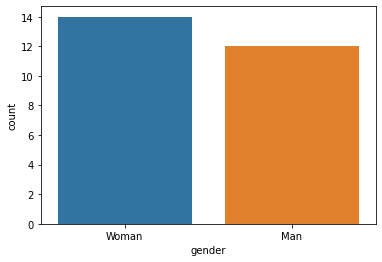

In [28]:
demo['gender'].value_counts()
sns.countplot(data=demo, x='gender', order=demo.gender.value_counts().index)

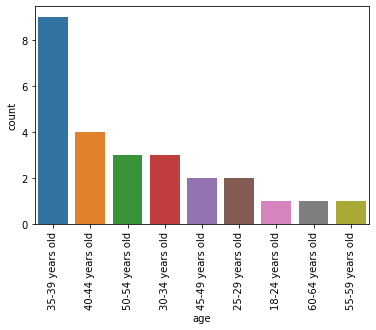

In [29]:
demo['age'].value_counts()
ax = sns.countplot(data=demo, x='age', order=demo.age.value_counts().index)
ax.tick_params(axis='x', rotation=90)


<AxesSubplot:xlabel='race', ylabel='count'>

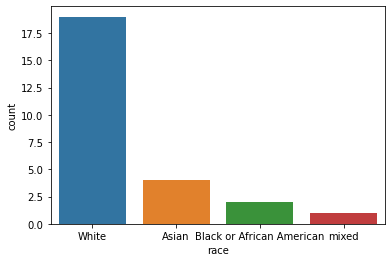

In [30]:
demo['race'].value_counts()
sns.countplot(data=demo, x='race', order=demo.race.value_counts().index)